<a href="https://colab.research.google.com/github/shivathmika339/Mini-Project/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Gathered images in the folder of images and got seperatedin the bikes and cars folders.

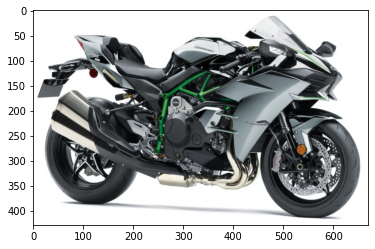

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
path = '/content/drive/MyDrive/images/bikes/06kawasaki-ninja-h2.jpg'
img = plt.imread(path)
plt.imshow(img)

top_electric_bikes_in_india_top_electric_motorcycles_top_electric_motorcycles_in_india_electric_m_1574329910_725x725.png


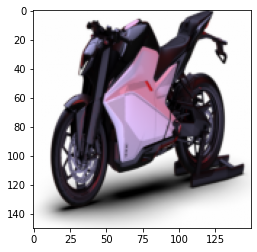

images.jpg


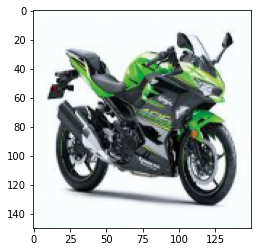

06kawasaki-ninja-h2.jpg


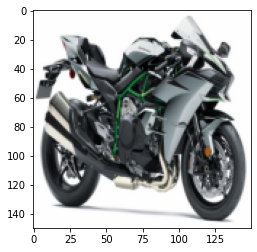

images (7).jpg


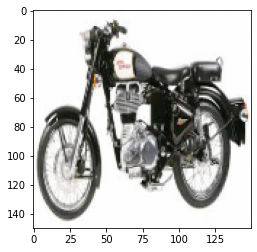

images (4).jpg


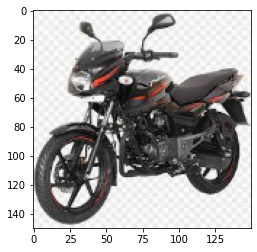

images (3).jpg


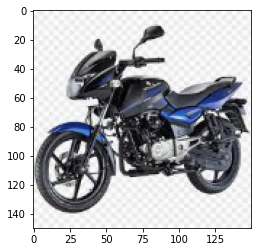

images (1).jpg


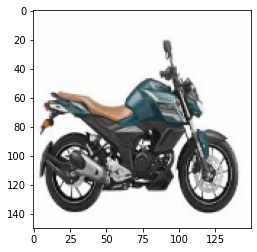

download (3).jpg


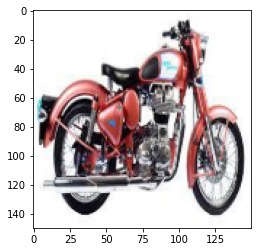

Bajaj-Pulsar-150-Image-3-.jpg


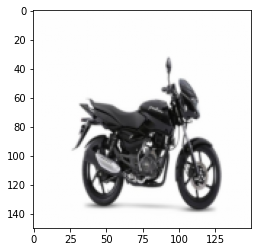

65d67a154741b381d47b12eebc403752.jpg


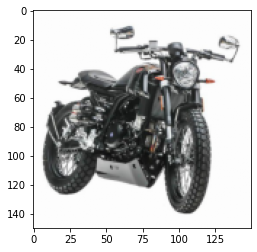

images (6).jpg


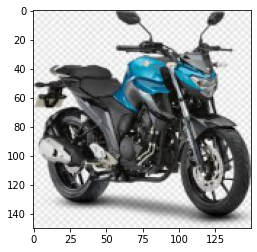

images (5).jpg


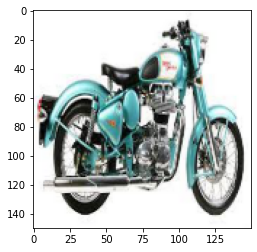

images (6).jpg


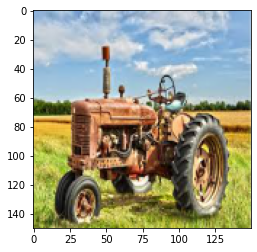

images (4).jpg


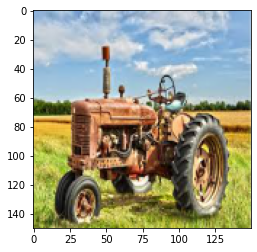

images (5).jpg


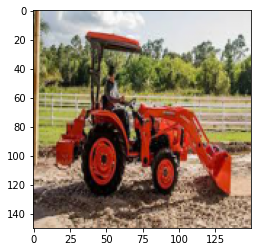

images (7).jpg


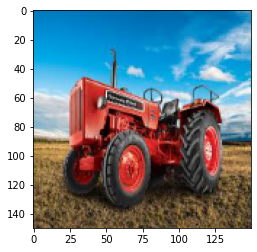

download (2).jpg


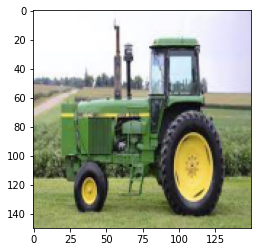

images (1).jpg


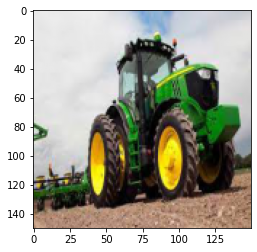

images (3).jpg


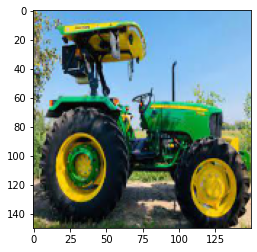

images (2).jpg


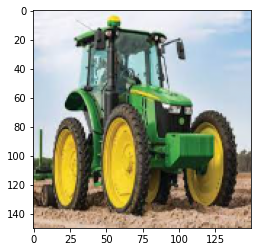

images.jpg


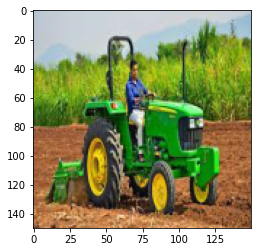

download (1).jpg


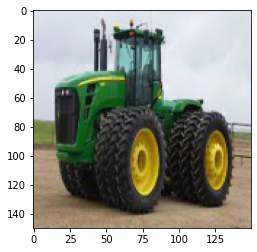

John Deere India_E Series Tractor.jpg


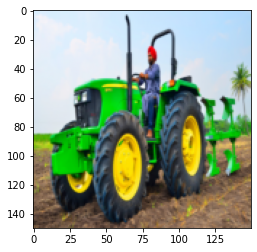

In [ ]:
#preprocessing the data 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

datadir = '/content/drive/MyDrive/images'

categories = ['bikes','tractors'] # Name the folder with these categories
target = []
flat_data = []
images = []

for i in categories:
  class_num = categories.index(i)
  path = os.path.join(datadir,i)
  #print(path)
  for img in os.listdir(path):
    print(img)
    img_array = imread(os.path.join(path,img))

    img_resize = resize(img_array,(150,150,3)) # Value gets converted 0-1 from 0-255
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(class_num)
    plt.imshow(img_resize)
    plt.show()

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
#creating a dataframe.
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
1,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,0.996078,0.996078,0.980392,...,0.980392,0.996078,0.996078,0.980392,0.993926,0.996078,0.985765,0.992732,0.996078,0.988235,0.992732,0.996078,0.988235,0.992732,0.996078,0.988235,0.992732,0.996078,0.988235,0.992732,0.996078,0.988235,0.992732,0.996078,0.988235,0.992732,0.996078,0.988235,0.992732,0.996078,0.987516,0.992732,0.996078,0.981268,0.992732,0.996078,0.980967,0.996078,0.996078,0
2,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
3,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
4,0.993163,0.993163,0.993163,0.995262,0.995262,0.995262,0.989603,0.989603,0.989603,0.966052,0.966052,0.966052,0.937660,0.937660,0.937660,0.933235,0.933235,0.933235,0.947304,0.947304,0.947304,0.964525,0.964525,0.964525,0.984941,0.984941,0.984941,0.994353,0.994353,0.994353,0.988863,0.988863,0.988863,0.923555,0.923555,0.923555,0.932327,0.932327,0.932327,0.911503,...,0.992157,0.992157,0.992157,0.984157,0.984157,0.984157,0.992000,0.992000,0.992000,0.940863,0.940863,0.940863,0.929098,0.929098,0.929098,0.916863,0.916863,0.916863,0.937412,0.937412,0.937412,0.989647,0.989647,0.989647,0.978980,0.978980,0.978980,0.986824,0.986824,0.986824,0.976471,0.976471,0.976471,0.927216,0.927216,0.927216,0.930510,0.930510,0.930510,0
5,0.986020,0.986020,0.986020,0.988235,0.988235,0.

In [ ]:
#splitting of the data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.65,random_state=0)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_pred)
cn

array([[8, 0],
       [0, 7]])

In [ ]:
from  sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

In [ ]:
#Support Vector Machine(SVC) using GridSearchCV.
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)
grid_result

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=4, random_state=1),
             error_score=0,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
accuracy = grid_result.best_score_
accuracy

1.0

In [ ]:
accuracy = grid_result.best_params_
accuracy

{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
#Evaluate the model using confusion matrix.
from sklearn.metrics import confusion_matrix,classification_report
cn = confusion_matrix(y_pred,y_test)
cn

array([[8, 0],
       [0, 7]])

In [ ]:
#Classification report.
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         7

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [ ]:
import pickle 
pickle.dump(grid_result,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://imgd.aeplcdn.com/476x268/bw/models/honda-sp-125-drum20191114135405.jpg?q=70
(268, 476, 3)
PREDICTED OUTPUT:bikes


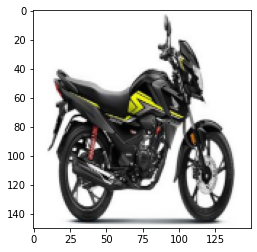

In [ ]:
#predict for the new image.
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')